<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hypothesis Testing**


Estimated time needed: **30** minutes


The goal of hypothesis testing is to answer the question, “Given a sample and an apparent effect, what is the probability of seeing such an effect by chance?” The first step is to quantify the size of the apparent effect by choosing a test statistic (t-test, ANOVA, etc). The next step is to define a null hypothesis, which is a model of the system based on the assumption that the apparent effect is not real. Then compute the p-value, which is the probability of the null hypothesis being true, and finally interpret the result of the p-value, if the value is low, the effect is said to be statistically significant, which means that the null hypothesis may not be accurate.


## Objectives


*   Import Libraries
*   Lab exercises
    *   Stating the hypothesis
    *   Levene's Test for equality
    *   Preparing your data for hypothesis testing
*   Quiz


***


## Import Libraries


All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented. If you run this notebook in a different environment, e.g. your desktop, you may need to uncomment and install certain libraries.


In [ ]:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2
#! mamba install scipy=1.7.1-y
#!  mamba install seaborn=0.9.0-y
#!  mamba install matplotlib=3.4.3-y
#!  mamba install statsmodels=0.12.0-y

Import the libraries we need for the lab


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
resp = await fetch(URL)
ratings_url = io.BytesIO((await resp.arrayBuffer()).to_py())

Read in the csv file from the URL using the request library


In [4]:
ratings_df = pd.read_csv(ratings_url)

## Lab Exercises


### T-Test: Using the teachers' rating data set, does gender affect teaching evaluation rates?


We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met.

*   One independent, categorical variable with two levels or group
*   One dependent continuous variable
*   Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
*   The dependent variable must follow a normal distribution
*   Assumption of homogeneity of variance


State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in evaluation scores between male and females")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in evaluation scores between male and females")


We can plot the dependent variable with a historgram


<ipython-input-5-15132377d28d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(ratings_df['eval'],


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

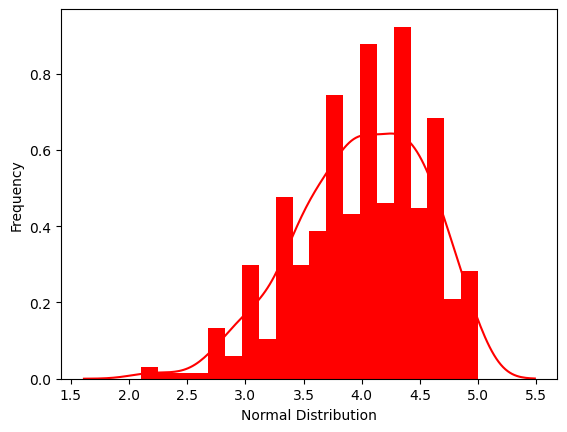

In [5]:
ax = sns.distplot(ratings_df['eval'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
## we can assume it is normal

We can use the Levene's Test in Python to check test significance


In [6]:
scipy.stats.levene(ratings_df[ratings_df['gender'] == 'female']['eval'],
                   ratings_df[ratings_df['gender'] == 'male']['eval'], center='mean')

# since the p-value is greater than 0.05 we can assume equality of variance

LeveneResult(statistic=0.19032922435292574, pvalue=0.6628469836244741)

Use the <code>ttest_ind</code> from the <code>scipy_stats</code> library


In [7]:
scipy.stats.ttest_ind(ratings_df[ratings_df['gender'] == 'female']['eval'],
                   ratings_df[ratings_df['gender'] == 'male']['eval'], equal_var = True)

TtestResult(statistic=-3.249937943510772, pvalue=0.0012387609449522217, df=461.0)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in teaching evaluations based on gender


### ANOVA: Using the teachers' rating data set, does beauty  score for instructors  differ by age?


First, we group the data into cateries as the one-way ANOVA can't work with continuous variable - using the example from the video, we will create a new column for this newly assigned group our categories will be teachers that are:

*   40 years and younger
*   between 40 and 57 years
*   57 years and older


In [8]:
ratings_df.loc[(ratings_df['age'] <= 40), 'age_group'] = '40 years and younger'
ratings_df.loc[(ratings_df['age'] > 40)&(ratings_df['age'] < 57), 'age_group'] = 'between 40 and 57 years'
ratings_df.loc[(ratings_df['age'] >= 57), 'age_group'] = '57 years and older'

State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ


Test for equality of variance


In [9]:
scipy.stats.levene(ratings_df[ratings_df['age_group'] == '40 years and younger']['beauty'],
                   ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['beauty'], 
                   ratings_df[ratings_df['age_group'] == '57 years and older']['beauty'], 
                   center='mean')
# since the p-value is less than 0.05, the variance are not equal, for the purposes of this exercise, we will move along

LeveneResult(statistic=8.60005668392584, pvalue=0.000215366180993476)

First, separate the three samples (one for each job category) into a variable each.


In [10]:
forty_lower = ratings_df[ratings_df['age_group'] == '40 years and younger']['beauty']
forty_fiftyseven = ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['beauty']
fiftyseven_older = ratings_df[ratings_df['age_group'] == '57 years and older']['beauty']

Now, run a one-way ANOVA.


In [11]:
f_statistic, p_value = scipy.stats.f_oneway(forty_lower, forty_fiftyseven, fiftyseven_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 17.597558611010122, P-Value: 4.3225489816137975e-08


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.


### ANOVA: Using the teachers' rating data set, does teaching  evaluation  score for instructors  differ  by age?


Test for equality of variance


In [12]:
scipy.stats.levene(ratings_df[ratings_df['age_group'] == '40 years and younger']['eval'],
                   ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['eval'], 
                   ratings_df[ratings_df['age_group'] == '57 years and older']['eval'], 
                   center='mean')


LeveneResult(statistic=3.820237661494229, pvalue=0.02262141852021939)

In [13]:
forty_lower_eval = ratings_df[ratings_df['age_group'] == '40 years and younger']['eval']
forty_fiftyseven_eval = ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['eval']
fiftyseven_older_eval = ratings_df[ratings_df['age_group'] == '57 years and older']['eval']

In [14]:
f_statistic, p_value = scipy.stats.f_oneway(forty_lower_eval, forty_fiftyseven_eval, fiftyseven_older_eval)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 1.2226327996572206, P-Value: 0.29540894225417536


**Conclusion:** Since the p-value is greater than 0.05, we will fail to reject the null hypothesis as there is no significant evidence that at least one of the means differ.


### Chi-square: Using the teachers' rating data set, is there an association between tenure and gender?


State the hypothesis:

*   $H\_0:$ The proportion of teachers who are tenured is independent of gender
*   $H\_1:$ The proportion of teachers who are tenured is associated with gender


Create a Cross-tab table


In [15]:
cont_table  = pd.crosstab(ratings_df['tenure'], ratings_df['gender'])
cont_table

gender,female,male
tenure,,
no,50,52
yes,145,216


Use the <code>scipy.stats</code> library and set correction equals False as that will be the same answer when done by hand, it returns: 𝜒2 value, p-value, degree of freedom, and expected values.


In [16]:
scipy.stats.chi2_contingency(cont_table, correction = False)

Chi2ContingencyResult(statistic=2.557051129789522, pvalue=0.10980322511302845, dof=1, expected_freq=array([[ 42.95896328,  59.04103672],
       [152.04103672, 208.95896328]]))

**Conclusion:** Since the p-value is greater than 0.05, we fail to reject the null hypothesis. As there is no sufficient evidence that teachers are tenured as a result of gender.


### Correlation: Using the teachers rating dataset, Is teaching  evaluation  score correlated with  beauty score?


State the hypothesis:

*   $H\_0:$ Teaching evaluation score is not correlated with beauty score
*   $H\_1:$ Teaching evaluation score is correlated with beauty score


Since they are both continuous variables we can use a pearson correlation test and draw a scatter plot


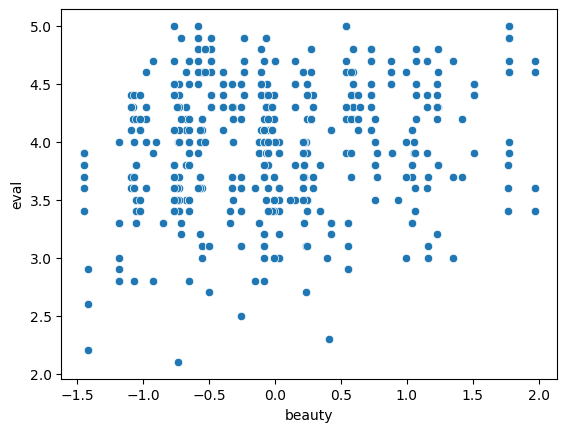

In [17]:
ax = sns.scatterplot(x="beauty", y="eval", data=ratings_df)

In [18]:
scipy.stats.pearsonr(ratings_df['beauty'], ratings_df['eval'])

PearsonRResult(statistic=0.18903909084045223, pvalue=4.247115419813475e-05)

**Conclusion:** Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between  beauty and teaching evaluation score.


## Practice Questions


### Question 1: Using the teachers rating data set, does tenure affect teaching evaluation scores?

*   Use α = 0.05


In [19]:
## insert code here
scipy.stats.ttest_ind(ratings_df[ratings_df['tenure'] == 'yes']['eval'],
                   ratings_df[ratings_df['tenure'] == 'no']['eval'], equal_var = True)

TtestResult(statistic=-2.8046798258451777, pvalue=0.005249471210198792, df=461.0)

Double-click **here** for the solution.

<!-- The answer is below:
scipy.stats.ttest_ind(ratings_df[ratings_df['tenure'] == 'yes']['eval'],
                   ratings_df[ratings_df['tenure'] == 'no']['eval'], equal_var = True)
The p-value is less than 0.05 that means that - we will reject the null hypothesis as there evidence that being tenured affects teaching evaluation scores
-->


### Question 2: Using the teachers rating data set, is there an association between age and tenure?

*   Discretize the age into three groups 40 years and youngers, between 40 and 57 years, 57 years and older (This has already been done for you above.)
*   What is your conclusion at α = 0.01 and α = 0.05?


* **Null Hypothesis:** There is no association between age and tenure
* **Alternative Hypothesis:** There is an association between age and tenure

In [23]:
## insert code here

cont_table  = pd.crosstab(ratings_df['tenure'], ratings_df['age_group'])
cont_table

age_group,40 years and younger,57 years and older,between 40 and 57 years
tenure,,,
no,15,25,62
yes,98,97,166


In [21]:
scipy.stats.chi2_contingency(cont_table, correction = True)

Chi2ContingencyResult(statistic=8.749576239010711, pvalue=0.012590809706820843, dof=2, expected_freq=array([[ 24.89416847,  26.87688985,  50.22894168],
       [ 88.10583153,  95.12311015, 177.77105832]]))

Double-click **here** for a hint.

<!-- The hint is below:
## state your hypothesis
Null Hypothesis: There is no association between age and tenure
Alternative Hypothesis: There is an association between age and tenure

## don't forget to create a cross tab of the data
cont_table  = pd.crosstab(ratings_df['tenure'], ratings_df['age_group'])
-->


Double-click **here** for the solution.

<!-- The answer is below:
## use the chi-square function
scipy.stats.chi2_contingency(cont_table, correction = True)
At the α = 0.01, p-value is greater, we fail to reject null hypothesis as there is no evidence of an association between age and tenure
At the α = 0.05, p-value is less, we reject null hypoothesis as there is evidence of an association between age and tenure
-->


### Question 3: Test for equality of variance for beauty scores between tenured and non-tenured instructors

*   Use α = 0.05


In [22]:
## insert code here
scipy.stats.levene(ratings_df[ratings_df['tenure'] == 'yes']['beauty'],
                   ratings_df[ratings_df['tenure'] == 'no']['beauty'], 
                   center='mean')

LeveneResult(statistic=0.4884241652750426, pvalue=0.4849835158609811)

Double-click **here** for the solution.

<!-- The answer is below:
### use the levene function to find the p-value and conclusion
scipy.stats.levene(ratings_df[ratings_df['tenure'] == 'yes']['beauty'],
                   ratings_df[ratings_df['tenure'] == 'no']['beauty'], 
                   center='mean')
Since the p-value is greater than 0.05, we will assume equality of variance of both groups
-->


### Question 4: Using the teachers rating data set, is there an association between visible minorities and tenure?

*   Use α = 0.05


##insert code here
* **Null Hypothesis:** There is no association between visible minorities and tenure
* **Alternative Hypothesis:** There is an association between visible minorities and tenure

In [25]:
cont_table  = pd.crosstab(ratings_df['vismin'], ratings_df['tenure'])
cont_table

tenure,no,yes
vismin,,
0,92,307
1,10,54


In [26]:
scipy.stats.chi2_contingency(cont_table, correction = True)

Chi2ContingencyResult(statistic=1.3675127484429763, pvalue=0.24223968800237178, dof=1, expected_freq=array([[ 87.90064795, 311.09935205],
       [ 14.09935205,  49.90064795]]))

Double-click **here** for a hint.

<!-- The hint is below:
##State you hypothesis and Create a cross-tab:
Null Hypothesis: There is no association between visible minorities and tenure
Alternative Hypothesis: There is an association between visible minorities and tenure

cont_table  = pd.crosstab(ratings_df['vismin'], ratings_df['tenure'])
-->


Double-click **here** for the solution.

<!-- The answer is below:
## run the chi2_contingency() on the contigency table
scipy.stats.chi2_contingency(cont_table, correction = True)
Since the p-value is greater than 0.05, we fail to reject null hypothesis as there is no evidence of an association between visible minorities and tenure
-->


## Authors

[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork956-2023-01-01)

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


<hr>

## <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
